In [2]:
from datasets import *
from train import *
from predict import *
from evaluate import *
from util import *
import numpy as np

# Experiments on monthly time scale:

To conduct the experiments on the monthly time scale we first create data sets from the climate model data.

We test 3 configurations:
- Training a separate UNet for each month (thus doesn't have to learn yearly cycle)
- Training one UNet to predict on all months (thus possible benefits from better generalization)
- Training one UNet to predict on all months, while using not only the current but also the previous month as input to the emulation

## Create datasets:

All months:

In [2]:
base_folder = "Datasets"
output_folder = "Output/Reproduce_monthly"

description = {}

description["DATASETS_USED"] = ["isotopes", 
                                "tsurf", 
                                "prec"]

description["PREDICTOR_VARIABLES"] = {"tsurf": ["tsurf"],
                                      "prec": ["prec"]}

description["TARGET_VARIABLES"] = {"isotopes": ["d18O"]}

description["DATASETS_NO_GAPS"] = ["isotopes", 
                                   "tsurf", 
                                   "prec", 
                                   "slp"]

description["CLIMATE_MODEL"] = "iHadCM3"
description["GRID_TYPE"] = "Flat"

description["START_YEAR"] = 850
description["END_YEAR"] = 1850
description["LATITUDES_SLICE"] = [1,-1]

description["SPLIT_YEAR"] = 1750
description["DO_SHUFFLE"] = False

description["PRECIP_WEIGHTING"] = False

description["TIMESCALE"] = "MONTHLY"
description["MONTHS_USED"] = np.sort([0,1,2,3,4,5,6,7,8,9,10,11]).tolist() # months of the year to use in this data set - Jan: 0 to Dec: 11
description["MONTHS_USED_IN_PREDICTION"] = np.sort([0]).tolist() # What months are used in prediction, if [0], only the current time step is used in prediction, if [0,-1] also the previous month is used.

In [ ]:
create_monthly_dataset(description, base_folder, output_folder)

All months, use lagged months in predictions:

In [ ]:
base_folder = "Datasets"
output_folder = "Output/Reproduce_monthly"

description = {}

description["DATASETS_USED"] = ["isotopes", 
                                "tsurf", 
                                "prec"]

description["PREDICTOR_VARIABLES"] = {"tsurf": ["tsurf"],
                                      "prec": ["prec"]}

description["TARGET_VARIABLES"] = {"isotopes": ["d18O"]}

description["DATASETS_NO_GAPS"] = ["isotopes", 
                                   "tsurf", 
                                   "prec", 
                                   "slp"]

description["CLIMATE_MODEL"] = "iHadCM3"
description["GRID_TYPE"] = "Flat"

description["START_YEAR"] = 850
description["END_YEAR"] = 1850
description["LATITUDES_SLICE"] = [1,-1]

description["SPLIT_YEAR"] = 1750
description["DO_SHUFFLE"] = False

description["PRECIP_WEIGHTING"] = False

description["TIMESCALE"] = "MONTHLY"
description["MONTHS_USED"] = np.sort([0,1,2,3,4,5,6,7,8,9,10,11]).tolist()
description["MONTHS_USED_IN_PREDICTION"] = np.sort([0,-1]).tolist() # use current and previous timestep in prediction

In [ ]:
create_monthly_dataset(description, base_folder, output_folder)

Individual dataset for each month:

In [ ]:
base_folder = "Datasets"
output_folder = "Output/Reproduce_monthly"

description = {}

description["DATASETS_USED"] = ["isotopes", 
                                "tsurf", 
                                "prec"]

description["PREDICTOR_VARIABLES"] = {"tsurf": ["tsurf"],
                                      "prec": ["prec"]}

description["TARGET_VARIABLES"] = {"isotopes": ["d18O"]}

description["DATASETS_NO_GAPS"] = ["isotopes", 
                                   "tsurf", 
                                   "prec", 
                                   "slp"]

description["CLIMATE_MODEL"] = "iHadCM3"
description["GRID_TYPE"] = "Flat"

description["START_YEAR"] = 850
description["END_YEAR"] = 1850
description["LATITUDES_SLICE"] = [1,-1]

description["SPLIT_YEAR"] = 1750
description["DO_SHUFFLE"] = False

description["PRECIP_WEIGHTING"] = False

description["TIMESCALE"] = "MONTHLY"
description["MONTHS_USED_IN_PREDICTION"] = np.sort([0]).tolist()

for i in range(12):
    description["MONTHS_USED"] = np.sort([i]).tolist() # create a separate data set for each month
    create_monthly_dataset(description, base_folder, output_folder)

# Run experiments on these datasets:

All months.

In [5]:
base_folder = "Datasets"
output_folder = "Output/Reproduce_monthly"

description = {}

description["DATASETS_USED"] = ["isotopes", 
                                "tsurf", 
                                "prec"]

description["PREDICTOR_VARIABLES"] = {"tsurf": ["tsurf"],
                                      "prec": ["prec"]}

description["TARGET_VARIABLES"] = {"isotopes": ["d18O"]}

description["DATASETS_NO_GAPS"] = ["isotopes", 
                                   "tsurf", 
                                   "prec", 
                                   "slp"]

description["CLIMATE_MODEL"] = "iHadCM3"
description["GRID_TYPE"] = "Flat"

description["START_YEAR"] = 850
description["END_YEAR"] = 1850
description["LATITUDES_SLICE"] = [1,-1]

description["SPLIT_YEAR"] = 1750
description["DO_SHUFFLE"] = False

description["PRECIP_WEIGHTING"] = False

description["TIMESCALE"] = "MONTHLY"
description["MONTHS_USED"] = np.sort([0,1,2,3,4,5,6,7,8,9,10,11]).tolist()
description["MONTHS_USED_IN_PREDICTION"] = np.sort([0]).tolist()

### MODEL_TRAINING ###############################################

model_training_description = {}
model_training_description["S_MODE_PREDICTORS"] = ["Pixelwise","Pixelwise"] # how to standardize the given variables
model_training_description["S_MODE_TARGETS"] = ["Pixelwise"]

model_training_description["DATASET_FOLDER"] = output_folder

model_training_description["MODEL_TYPE"] = "UNet_Flat"
model_training_description["CREATE_VALIDATIONSET"] = True
model_training_description["SHUFFLE_VALIDATIONSET"] = True


# training parameters

model_training_description["DEPTH"] = 3
model_training_description["NUM_EPOCHS"] = "early_stopping"  # 20
model_training_description["PATIENCE"] = 5
model_training_description["BATCH_SIZE"] = 8
model_training_description["LEARNING_RATE"] = 1e-3  # 0.002637 # 5e-3  # use either this or default ADAM learning rate

# model parameters
model_training_description["DEPTH"] = 3
model_training_description["IN_CHANNELS"] = len(util.flatten(description["PREDICTOR_VARIABLES"].values()))
model_training_description["CHANNELS_FIRST_CONV"] = 32
model_training_description["OUT_CHANNELS"] = len(util.flatten(description["TARGET_VARIABLES"].values()))
model_training_description["FMAPS"] = (32,32,64,64)


model_training_description["ACTIVATION"] = torch.nn.ReLU
model_training_description["NORMALIZATION"] = torch.nn.BatchNorm2d  # IcoBatchNorm2d 


model_training_description["OPTIMIZER"] = "Adam"

model_training_description["DEVICE"] = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_training_description["USE_CYLINDRICAL_PADDING"] = True
model_training_description["USE_COORD_CONV"] = True
model_training_description["LOSS"] = "Masked_AreaWeightedMSELoss"

In [ ]:
n_runs = 5  # run 5 experiments for each configuration
for i in range(n_runs):
    model_training_description["RUN_NR"] = i
    unet = train_unet(description, model_training_description, output_folder)
    predict_save_unet(description, model_training_description, output_folder, unet, output_folder)

All months, use previous timestep in prediction

In [ ]:
base_folder = "Datasets"
output_folder = "Output/Reproduce_monthly"

description = {}

description["DATASETS_USED"] = ["isotopes", 
                                "tsurf",
                                "prec"]

description["PREDICTOR_VARIABLES"] = {"tsurf": ["tsurf"],
                                      "prec": ["prec"]}

description["TARGET_VARIABLES"] = {"isotopes": ["d18O"]}

description["DATASETS_NO_GAPS"] = ["isotopes", 
                                   "tsurf", 
                                   "prec", 
                                   "slp"]

description["CLIMATE_MODEL"] = "iHadCM3"
description["GRID_TYPE"] = "Flat"

description["START_YEAR"] = 850
description["END_YEAR"] = 1850
description["LATITUDES_SLICE"] = [1,-1]

description["SPLIT_YEAR"] = 1750
description["DO_SHUFFLE"] = False
description["PRECIP_WEIGHTING"] = False


description["TIMESCALE"] = "MONTHLY"
description["MONTHS_USED"] = np.sort([0,1,2,3,4,5,6,7,8,9,10,11]).tolist()
description["MONTHS_USED_IN_PREDICTION"] = np.sort([0,-1]).tolist()

### MODEL_TRAINING ###############################################

model_training_description = {}
model_training_description["S_MODE_PREDICTORS"] = ["Pixelwise","Pixelwise","Pixelwise","Pixelwise"] # how to standardize the given variables
model_training_description["S_MODE_TARGETS"] = ["Pixelwise"]

model_training_description["DATASET_FOLDER"] = output_folder

model_training_description["MODEL_TYPE"] = "UNet_Flat"
model_training_description["CREATE_VALIDATIONSET"] = True
model_training_description["SHUFFLE_VALIDATIONSET"] = True


# training parameters

model_training_description["DEPTH"] = 3
model_training_description["NUM_EPOCHS"] = "early_stopping"  # 20
model_training_description["PATIENCE"] = 5
model_training_description["BATCH_SIZE"] = 8
model_training_description["LEARNING_RATE"] = 1e-3  # 0.002637 # 5e-3  # use either this or default ADAM learning rate

# model parameters
model_training_description["DEPTH"] = 3
model_training_description["IN_CHANNELS"] = len(util.flatten(description["PREDICTOR_VARIABLES"].values()))*2
model_training_description["CHANNELS_FIRST_CONV"] = 32
model_training_description["OUT_CHANNELS"] = len(util.flatten(description["TARGET_VARIABLES"].values()))
model_training_description["FMAPS"] = (32,32,64,64)


model_training_description["ACTIVATION"] = torch.nn.ReLU
model_training_description["NORMALIZATION"] = torch.nn.BatchNorm2d  # IcoBatchNorm2d 


model_training_description["OPTIMIZER"] = "Adam"

model_training_description["DEVICE"] = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_training_description["USE_CYLINDRICAL_PADDING"] = True
model_training_description["USE_COORD_CONV"] = True
model_training_description["LOSS"] = "Masked_AreaWeightedMSELoss"

In [ ]:
n_runs = 5
for i in range(n_runs):
    model_training_description["RUN_NR"] = i
    unet = train_unet(description, model_training_description, output_folder)
    predict_save_unet(description, model_training_description, output_folder, unet, output_folder)

Individual models for different cases:

In [ ]:
base_folder = "Datasets"
output_folder = "Output/Reproduce_monthly"

description = {}

description["DATASETS_USED"] = ["isotopes", 
                                "tsurf",
                                "prec"]

description["PREDICTOR_VARIABLES"] = {"tsurf": ["tsurf"],
                                      "prec": ["prec"]}

description["TARGET_VARIABLES"] = {"isotopes": ["d18O"]}

description["DATASETS_NO_GAPS"] = ["isotopes", 
                                   "tsurf", 
                                   "prec", 
                                   "slp"]

description["CLIMATE_MODEL"] = "iHadCM3"
description["GRID_TYPE"] = "Flat"

description["START_YEAR"] = 850
description["END_YEAR"] = 1850
description["LATITUDES_SLICE"] = [1,-1]

description["SPLIT_YEAR"] = 1750
description["DO_SHUFFLE"] = False
description["PRECIP_WEIGHTING"] = False


description["TIMESCALE"] = "MONTHLY"
description["MONTHS_USED_IN_PREDICTION"] = np.sort([0]).tolist()

### MODEL_TRAINING ###############################################

model_training_description = {}
model_training_description["S_MODE_PREDICTORS"] = ["Pixelwise","Pixelwise"] # how to standardize the given variables
model_training_description["S_MODE_TARGETS"] = ["Pixelwise"]

model_training_description["DATASET_FOLDER"] = output_folder

model_training_description["MODEL_TYPE"] = "UNet_Flat"
model_training_description["CREATE_VALIDATIONSET"] = True
model_training_description["SHUFFLE_VALIDATIONSET"] = True


# training parameters

model_training_description["DEPTH"] = 3
model_training_description["NUM_EPOCHS"] = "early_stopping"  # 20
model_training_description["PATIENCE"] = 5
model_training_description["BATCH_SIZE"] = 8
model_training_description["LEARNING_RATE"] = 1e-3  # 0.002637 # 5e-3  # use either this or default ADAM learning rate

# model parameters
model_training_description["DEPTH"] = 3
model_training_description["IN_CHANNELS"] = len(util.flatten(description["PREDICTOR_VARIABLES"].values()))
model_training_description["CHANNELS_FIRST_CONV"] = 32
model_training_description["OUT_CHANNELS"] = len(util.flatten(description["TARGET_VARIABLES"].values()))
model_training_description["FMAPS"] = (32,32,64,64)


model_training_description["ACTIVATION"] = torch.nn.ReLU
model_training_description["NORMALIZATION"] = torch.nn.BatchNorm2d  # IcoBatchNorm2d 


model_training_description["OPTIMIZER"] = "Adam"

model_training_description["DEVICE"] = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_training_description["USE_CYLINDRICAL_PADDING"] = True
model_training_description["USE_COORD_CONV"] = True
model_training_description["LOSS"] = "Masked_AreaWeightedMSELoss"

In [ ]:
n_runs = 5
for j in range(n_runs):
    model_training_description["RUN_NR"] = j
    for i in range(12):
        description["MONTHS_USED"] = np.sort([i]).tolist()
        unet = train_unet(description, model_training_description, output_folder)
        predict_save_unet(description, model_training_description, output_folder, unet, output_folder)

# Evaluate the results:

In [3]:
base_folder = "Datasets"
output_folder = "Output/Reproduce_monthly"

c_all = {
    "DATASET_DESCRIPTION": {'MONTHS_USED': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                            'MONTHS_USED_IN_PREDICTION': [0]},
    "MODEL_TRAINING_DESCRIPTION": {}
}

descriptions, predictions, gt, masks = load_data_for_comparison(output_folder, c_all, do_split=True)

c_all_use_p = {
    "DATASET_DESCRIPTION": {'MONTHS_USED': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                            'MONTHS_USED_IN_PREDICTION': [-1, 0]},
    "MODEL_TRAINING_DESCRIPTION": {}
}

descriptions_p, predictions_p, gt_p, masks_p = load_data_for_comparison(output_folder, c_all_use_p, do_split=True)

5 matching runs found
5 matching runs found


In [4]:
r2_single = []

for i in range(12):
    r2_single.append([])
    c_single = {
        "DATASET_DESCRIPTION": {'MONTHS_USED': [i],
                                'MONTHS_USED_IN_PREDICTION': [0]},
        "MODEL_TRAINING_DESCRIPTION": {}
    }
    descriptions_s, predictions_s, gt_s, masks_s = load_data_for_comparison(output_folder, c_single, do_split=True)
    for j in range(3):
        r2 = get_r2(predictions_s[j][i], gt_s[j][i], masks_s[j][i])
        r2_single[-1].append(get_weighted_average(r2, descriptions[j]["DATASET_DESCRIPTION"])[0])
        
r2_single = np.mean(np.array(r2_single),axis=1)

5 matching runs found
5 matching runs found
5 matching runs found
5 matching runs found
5 matching runs found
5 matching runs found
5 matching runs found
5 matching runs found
5 matching runs found
5 matching runs found
5 matching runs found
5 matching runs found


On the monthly time scale there is an annual cycle in the isotopes. This cycle can be trivially explained by just using the climatological mean. In order to not include this part into the computation of the $R^2$ score, we compute the $R^2$ score separately for each month.

In [5]:
r2_all = []
r2_all_use_p = []

for j in range(3):
    r2_all.append([])
    r2_all_use_p.append([])
    for i in range(12):
        r2 = get_r2(predictions[j][i], gt[j][i], masks[j][i])
        r2_p = get_r2(predictions_p[j][i], gt_p[j][i], masks_p[j][i])
        r2_all[-1].append(get_weighted_average(r2, descriptions[j]["DATASET_DESCRIPTION"])[0])
        r2_all_use_p[-1].append(get_weighted_average(r2_p, descriptions_p[j]["DATASET_DESCRIPTION"])[0])
        
r2_all = np.mean(np.array(r2_all),axis=0)
r2_all_use_p = np.mean(np.array(r2_all_use_p),axis=0)

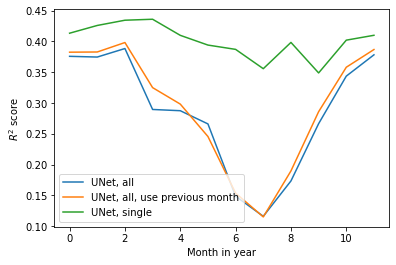

In [7]:
import matplotlib.pyplot as plt

plt.plot(r2_all, label="UNet, all")
plt.xlabel("Month in year")
plt.ylabel("$R^2$ score")
plt.plot(r2_all_use_p, label="UNet, all, use previous month")
plt.plot(r2_single, label="UNet, single")
plt.legend()